# Mise en situation - Détection cancer du sein 

Vous travaillez pour un clinique qui souhaite développer un modèle permettant de prédire la présence de cellules cancéreuse à partir des caractéristiques de cellules prélevées sur le sein à l'aide d'une biopsie à l'aiguille fine.  

Pour cette mission, vous disposez du fichier de données `breast_cancer.csv`, de la documentation de ces données (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download) et du code d'un consultant avant vous, qui a eu le temps d'entraîner un premier modèle de prédiction.  

Cependant, ce consultant n'a pas fait de travail préliminaire d'exploration des données et le client pense que le modèle pourrait être amélioré. Votre mission est donc :  

- De présenter de manière extensive les données à votre client, par des statistiques descriptives et des visualisations adaptées.  
- De proposer de nouveaux modèles de prédiction et de présenter les métriques d'évaluation adaptées pour justifier ou non des meilleurs résultats que le précédent.  

# 1.  Analyse exploratoire des données  

Pour cette partie, vous êtes libres des choix que vous ferez. Il faut cependant que votre notebook contienne :  
- Affichage de quelques lignes du dataframe pour montrer sa structure.  
- Présentation des différentes variables de la base et de leur type.  
- Statistiques descriptives sur chacune des variables en fonction de leur type.  
- Présenter des statistiques par diagnostic (bénin/malin) pour les variables, permettant de mettre en évidence l'aspect plus ou moins discriminant de certaines variables.  
- Illustrer à l'aide de graphiques les variables les plus discriminantes en fonction du diagnostic (scatterplot avec différentes couleurs).  

In [72]:
import pandas as pd
df_breast = pd.read_csv("data/breast_cancer.csv")
df_breast.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Nom et type des colonnes : 

In [73]:
df_breast.dtypes.sort_index()

Unnamed: 32                float64
area_mean                  float64
area_se                    float64
area_worst                 float64
compactness_mean           float64
compactness_se             float64
compactness_worst          float64
concave points_mean        float64
concave points_se          float64
concave points_worst       float64
concavity_mean             float64
concavity_se               float64
concavity_worst            float64
diagnosis                   object
fractal_dimension_mean     float64
fractal_dimension_se       float64
fractal_dimension_worst    float64
id                           int64
perimeter_mean             float64
perimeter_se               float64
perimeter_worst            float64
radius_mean                float64
radius_se                  float64
radius_worst               float64
smoothness_mean            float64
smoothness_se              float64
smoothness_worst           float64
symmetry_mean              float64
symmetry_se         

La dernière colonne n'en est pas une : on la supprime. On supprime également l'identifiant qui ne va pas nous servir, après avoir vérifié que l'on n'a pas de doublons

In [74]:
len(df_breast.id.unique()) == len(df_breast) # C'est true

True

In [75]:
# On ne conserve que les variables qui nous intéressent
df_breast = df_breast.loc[:, "diagnosis":"fractal_dimension_worst"]
df_breast.shape

(569, 31)

Les variables donnent plusieurs indicateurs d'une même mesure. On choisit de trier les variables dans la table pour que les variables correspondant à la même mesure soient ensemble

In [76]:
df_breast = df_breast.loc[:, df_breast.columns.sort_values()].copy()

### Analyse exploratoire  

#### Quelques statistiques descriptives  

On commence par décrire grossièrement l'ensemble des variables numériques avec `describe` : 

In [77]:
df_breast.iloc[:, :9].describe()

area_mean     area_se   area_worst  compactness_mean  compactness_se  \
count   569.000000  569.000000   569.000000        569.000000      569.000000   
mean    654.889104   40.337079   880.583128          0.104341        0.025478   
std     351.914129   45.491006   569.356993          0.052813        0.017908   
min     143.500000    6.802000   185.200000          0.019380        0.002252   
25%     420.300000   17.850000   515.300000          0.064920        0.013080   
50%     551.100000   24.530000   686.500000          0.092630        0.020450   
75%     782.700000   45.190000  1084.000000          0.130400        0.032450   
max    2501.000000  542.200000  4254.000000          0.345400        0.135400   

       compactness_worst  concave points_mean  concave points_se  \
count         569.000000           569.000000         569.000000   
mean            0.254265             0.048919           0.011796   
std             0.157336             0.038803           0.006170   
min             0.027290             0.000000           0.000000   
25%             0.147200             0.020310           0.007638   
50%             0.211900             0.033500           0.010930   
75%             0.339100             0.074000           0.014710   
max             1.058000             0.201200           0.052790   

       concave points_worst  
count            569.000000  
mean               0.114606  
std                0.065732  
min                0.000000  
25%                0.064930  
50%                0.099930  
75%                0.161400  
max                0.291000

In [78]:
df_breast.iloc[:, 9:19].describe()

concavity_mean  concavity_se  concavity_worst  fractal_dimension_mean  \
count      569.000000    569.000000       569.000000              569.000000   
mean         0.088799      0.031894         0.272188                0.062798   
std          0.079720      0.030186         0.208624                0.007060   
min          0.000000      0.000000         0.000000                0.049960   
25%          0.029560      0.015090         0.114500                0.057700   
50%          0.061540      0.025890         0.226700                0.061540   
75%          0.130700      0.042050         0.382900                0.066120   
max          0.426800      0.396000         1.252000                0.097440   

       fractal_dimension_se  fractal_dimension_worst  perimeter_mean  \
count            569.000000               569.000000      569.000000   
mean               0.003795                 0.083946       91.969033   
std                0.002646                 0.018061       24.298981   
min                0.000895                 0.055040       43.790000   
25%                0.002248                 0.071460       75.170000   
50%                0.003187                 0.080040       86.240000   
75%                0.004558                 0.092080      104.100000   
max                0.029840                 0.207500      188.500000   

       perimeter_se  perimeter_worst  
count    569.000000       569.000000  
mean       2.866059       107.261213  
std        2.021855        33.602542  
min        0.757000        50.410000  
25%        1.606000        84.110000  
50%        2.287000        97.660000  
75%        3.357000       125.400000  
max       21.980000       251.200000

In [79]:
df_breast.iloc[:, 19:].describe()

radius_mean   radius_se  radius_worst  smoothness_mean  smoothness_se  \
count   569.000000  569.000000    569.000000       569.000000     569.000000   
mean     14.127292    0.405172     16.269190         0.096360       0.007041   
std       3.524049    0.277313      4.833242         0.014064       0.003003   
min       6.981000    0.111500      7.930000         0.052630       0.001713   
25%      11.700000    0.232400     13.010000         0.086370       0.005169   
50%      13.370000    0.324200     14.970000         0.095870       0.006380   
75%      15.780000    0.478900     18.790000         0.105300       0.008146   
max      28.110000    2.873000     36.040000         0.163400       0.031130   

       smoothness_worst  symmetry_mean  symmetry_se  symmetry_worst  \
count        569.000000     569.000000   569.000000      569.000000   
mean           0.132369       0.181162     0.020542        0.290076   
std            0.022832       0.027414     0.008266        0.061867   
min            0.071170       0.106000     0.007882        0.156500   
25%            0.116600       0.161900     0.015160        0.250400   
50%            0.131300       0.179200     0.018730        0.282200   
75%            0.146000       0.195700     0.023480        0.317900   
max            0.222600       0.304000     0.078950        0.663800   

       texture_mean  texture_se  texture_worst  
count    569.000000  569.000000     569.000000  
mean      19.289649    1.216853      25.677223  
std        4.301036    0.551648       6.146258  
min        9.710000    0.360200      12.020000  
25%       16.170000    0.833900      21.080000  
50%       18.840000    1.108000      25.410000  
75%       21.800000    1.474000      29.720000  
max       39.280000    4.885000      49.540000

Et on compte les occurences de notre variable d'intérêt : 

In [80]:
df_breast.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

__Premières conclusions :__ Pas de valeurs manquantes, différentes échelles de valeurs en fonction de l'indicateur retenu.  

On cherche maintenant à faire des statistiques de nos variables numériques par diagnostic de la maladie avec `groupby`. 

In [81]:
df_breast.iloc[:, [12] + list(range(9))].groupby("diagnosis").mean()

area_mean    area_se   area_worst  compactness_mean  \
diagnosis                                                         
B          462.790196  21.135148   558.899440          0.080085   
M          978.376415  72.672406  1422.286321          0.145188   

           compactness_se  compactness_worst  concave points_mean  \
diagnosis                                                           
B                0.021438           0.182673             0.025717   
M                0.032281           0.374824             0.087990   

           concave points_se  concave points_worst  
diagnosis                                           
B                   0.009858              0.074444  
M                   0.015060              0.182237

In [82]:
df_breast.iloc[:, list(range(9, 19))].groupby("diagnosis").mean()

concavity_mean  concavity_se  concavity_worst  \
diagnosis                                                  
B                0.046058      0.025997         0.166238   
M                0.160775      0.041824         0.450606   

           fractal_dimension_mean  fractal_dimension_se  \
diagnosis                                                 
B                        0.062867              0.003636   
M                        0.062680              0.004062   

           fractal_dimension_worst  perimeter_mean  perimeter_se  \
diagnosis                                                          
B                         0.079442       78.075406      2.000321   
M                         0.091530      115.365377      4.323929   

           perimeter_worst  
diagnosis                   
B                87.005938  
M               141.370330

In [83]:
df_breast.iloc[:, [12] + list(range(19, df_breast.shape[1]))].groupby("diagnosis").mean()

radius_mean  radius_se  radius_worst  smoothness_mean  \
diagnosis                                                          
B            12.146524   0.284082     13.379801         0.092478   
M            17.462830   0.609083     21.134811         0.102898   

           smoothness_se  smoothness_worst  symmetry_mean  symmetry_se  \
diagnosis                                                                
B               0.007196          0.124959       0.174186     0.020584   
M               0.006780          0.144845       0.192909     0.020472   

           symmetry_worst  texture_mean  texture_se  texture_worst  
diagnosis                                                           
B                0.270246     17.914762    1.220380      23.515070  
M                0.323468     21.604906    1.210915      29.318208

On constate qu'il y a souvent des différences importantes des différentes mesures entre cellules saines ou non. En particulier, les cas malins ont des surfaces, compacités, concavités et radius plus importants. les autres variables semblent moins déterminantes.  

## Visualisations des données 

Pour la partie visualisation des données, on propose des [pairplots réalisés à l'aide de seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html) pour illustrer les différences entre cellules saines et malades. Cette fois, on regroupe les variables par type de métrique : moyenne, écart-type et worst.  

### Moyennes des mesures

In [84]:
# Pour les moyennes de chacun des indicateurs : 
# on sélectionne les colonnes correspondant aux moyennes
cols_moy = [i for i in df_breast.columns if i.endswith("_mean")]

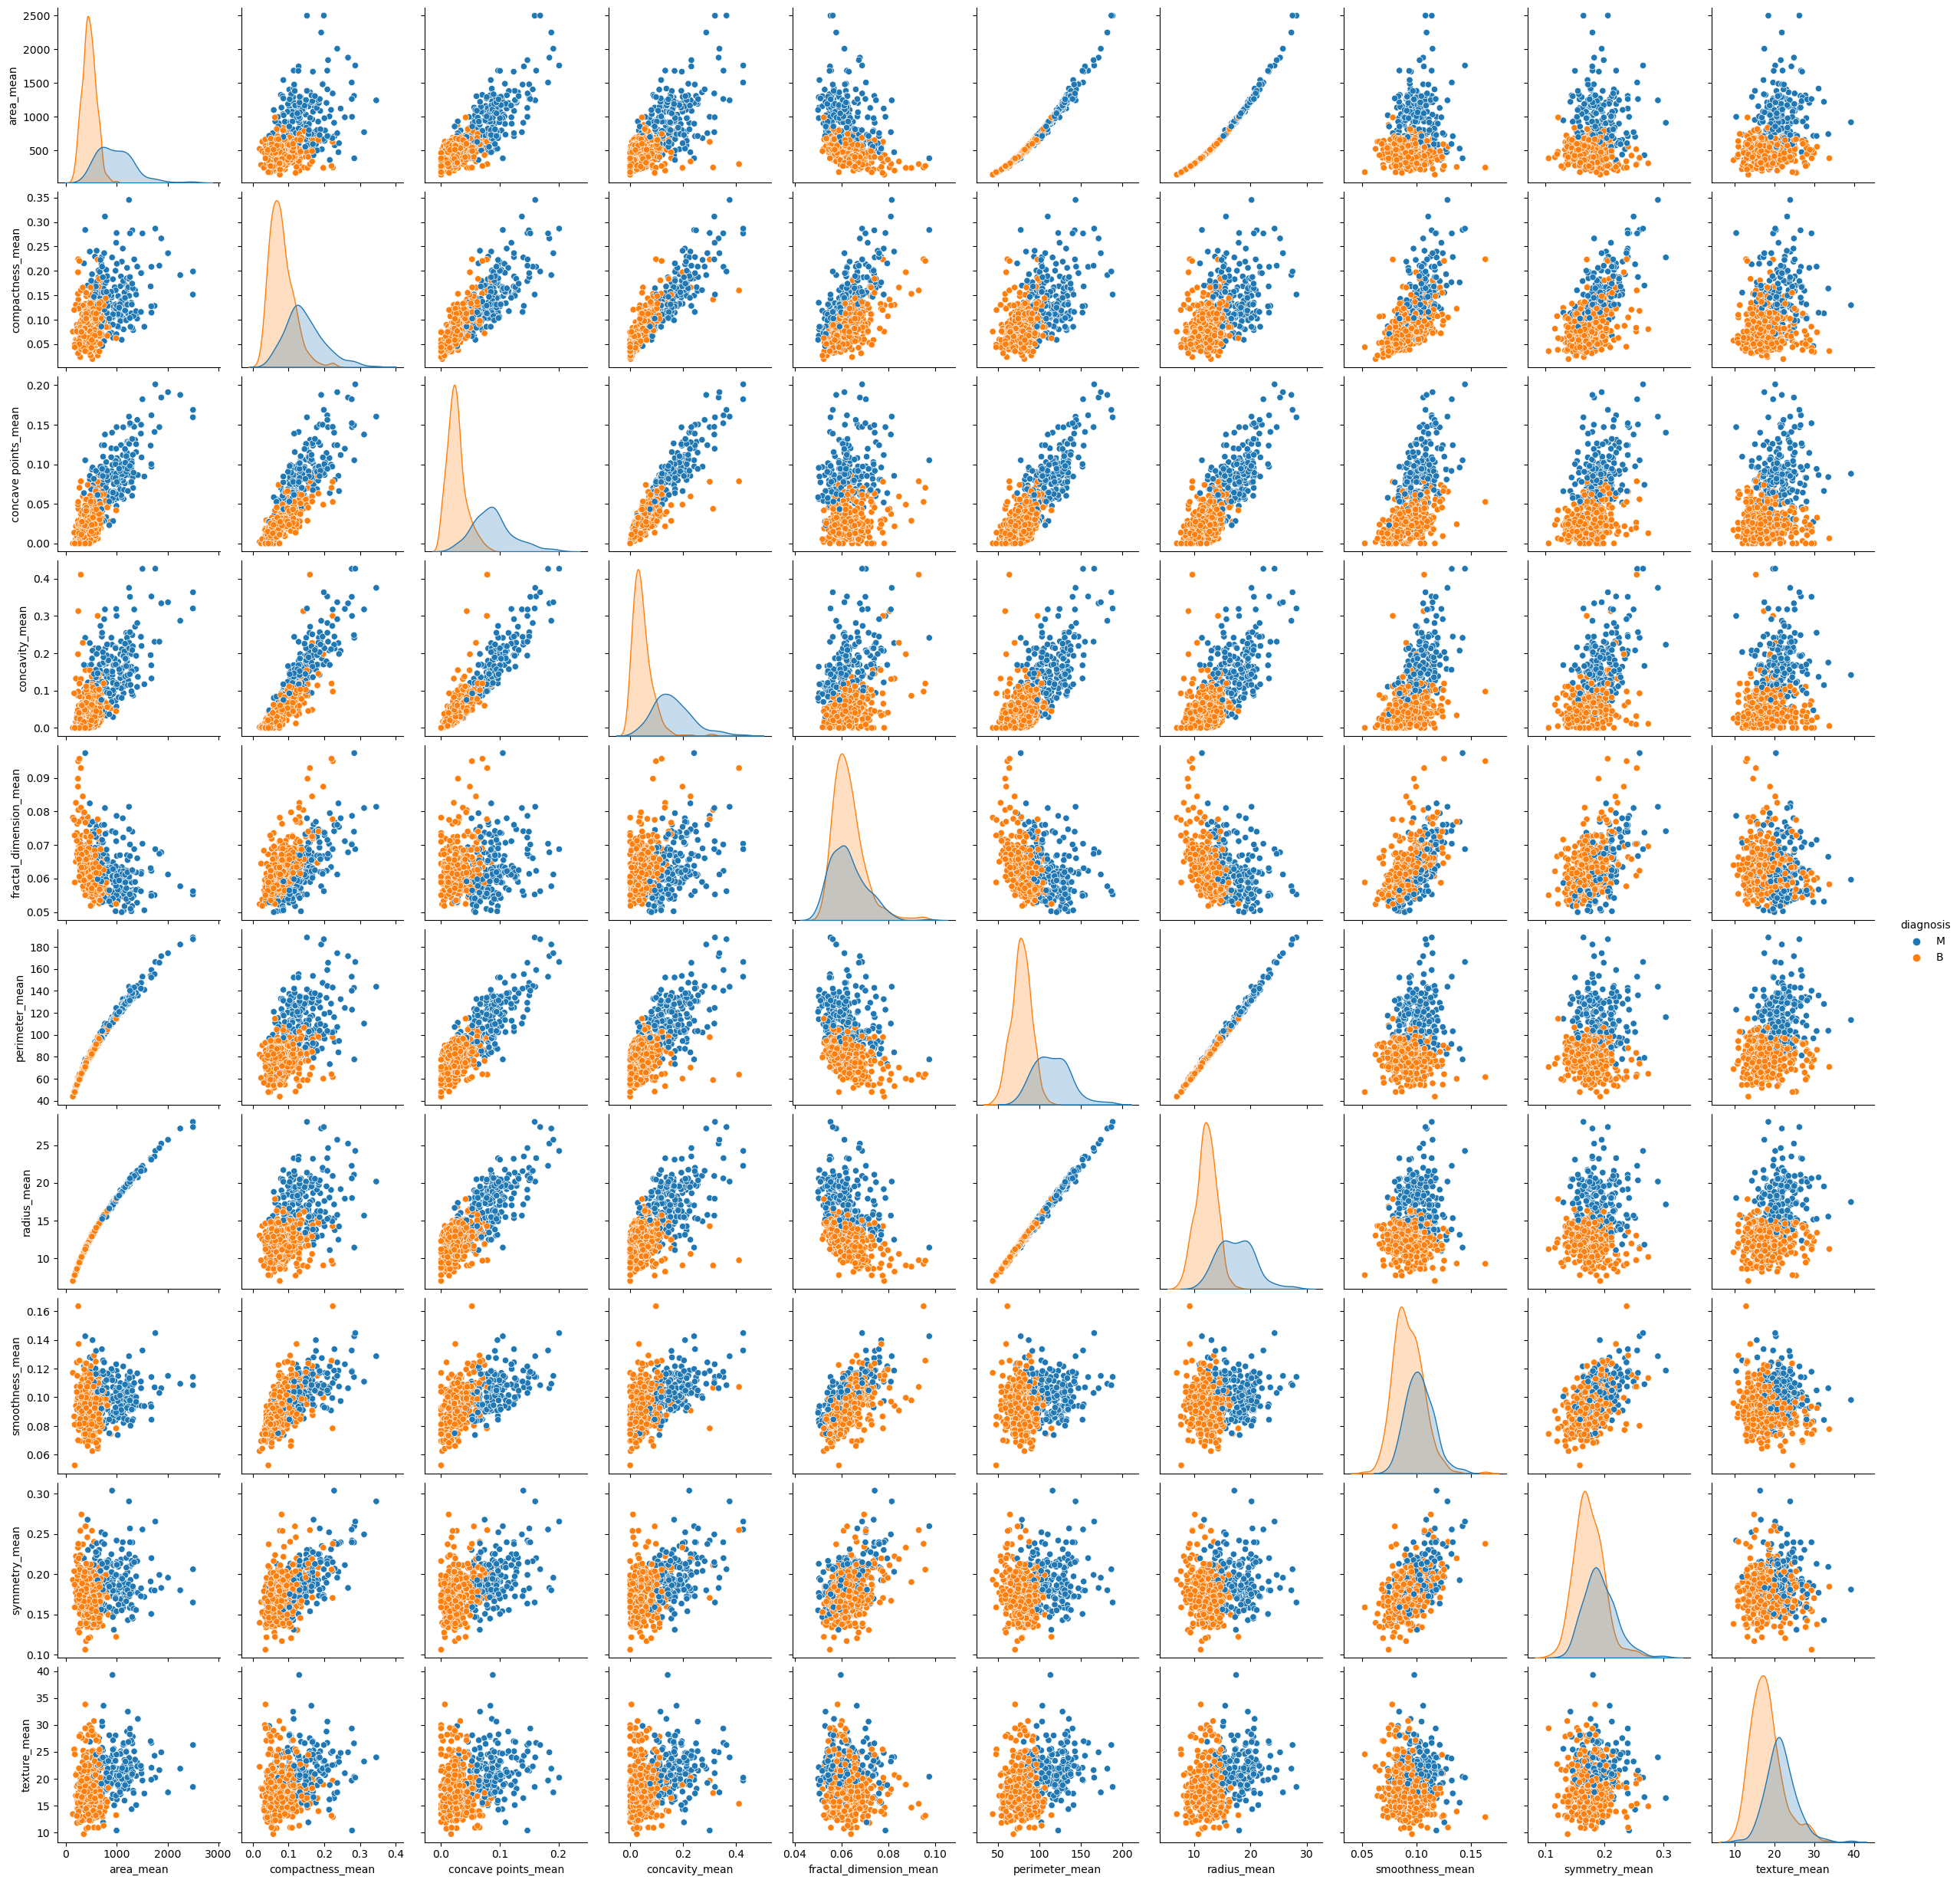

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
pplot = sns.pairplot(df_breast[["diagnosis"] + cols_moy], hue="diagnosis")
plt.show()

### Écarts-type des mesures

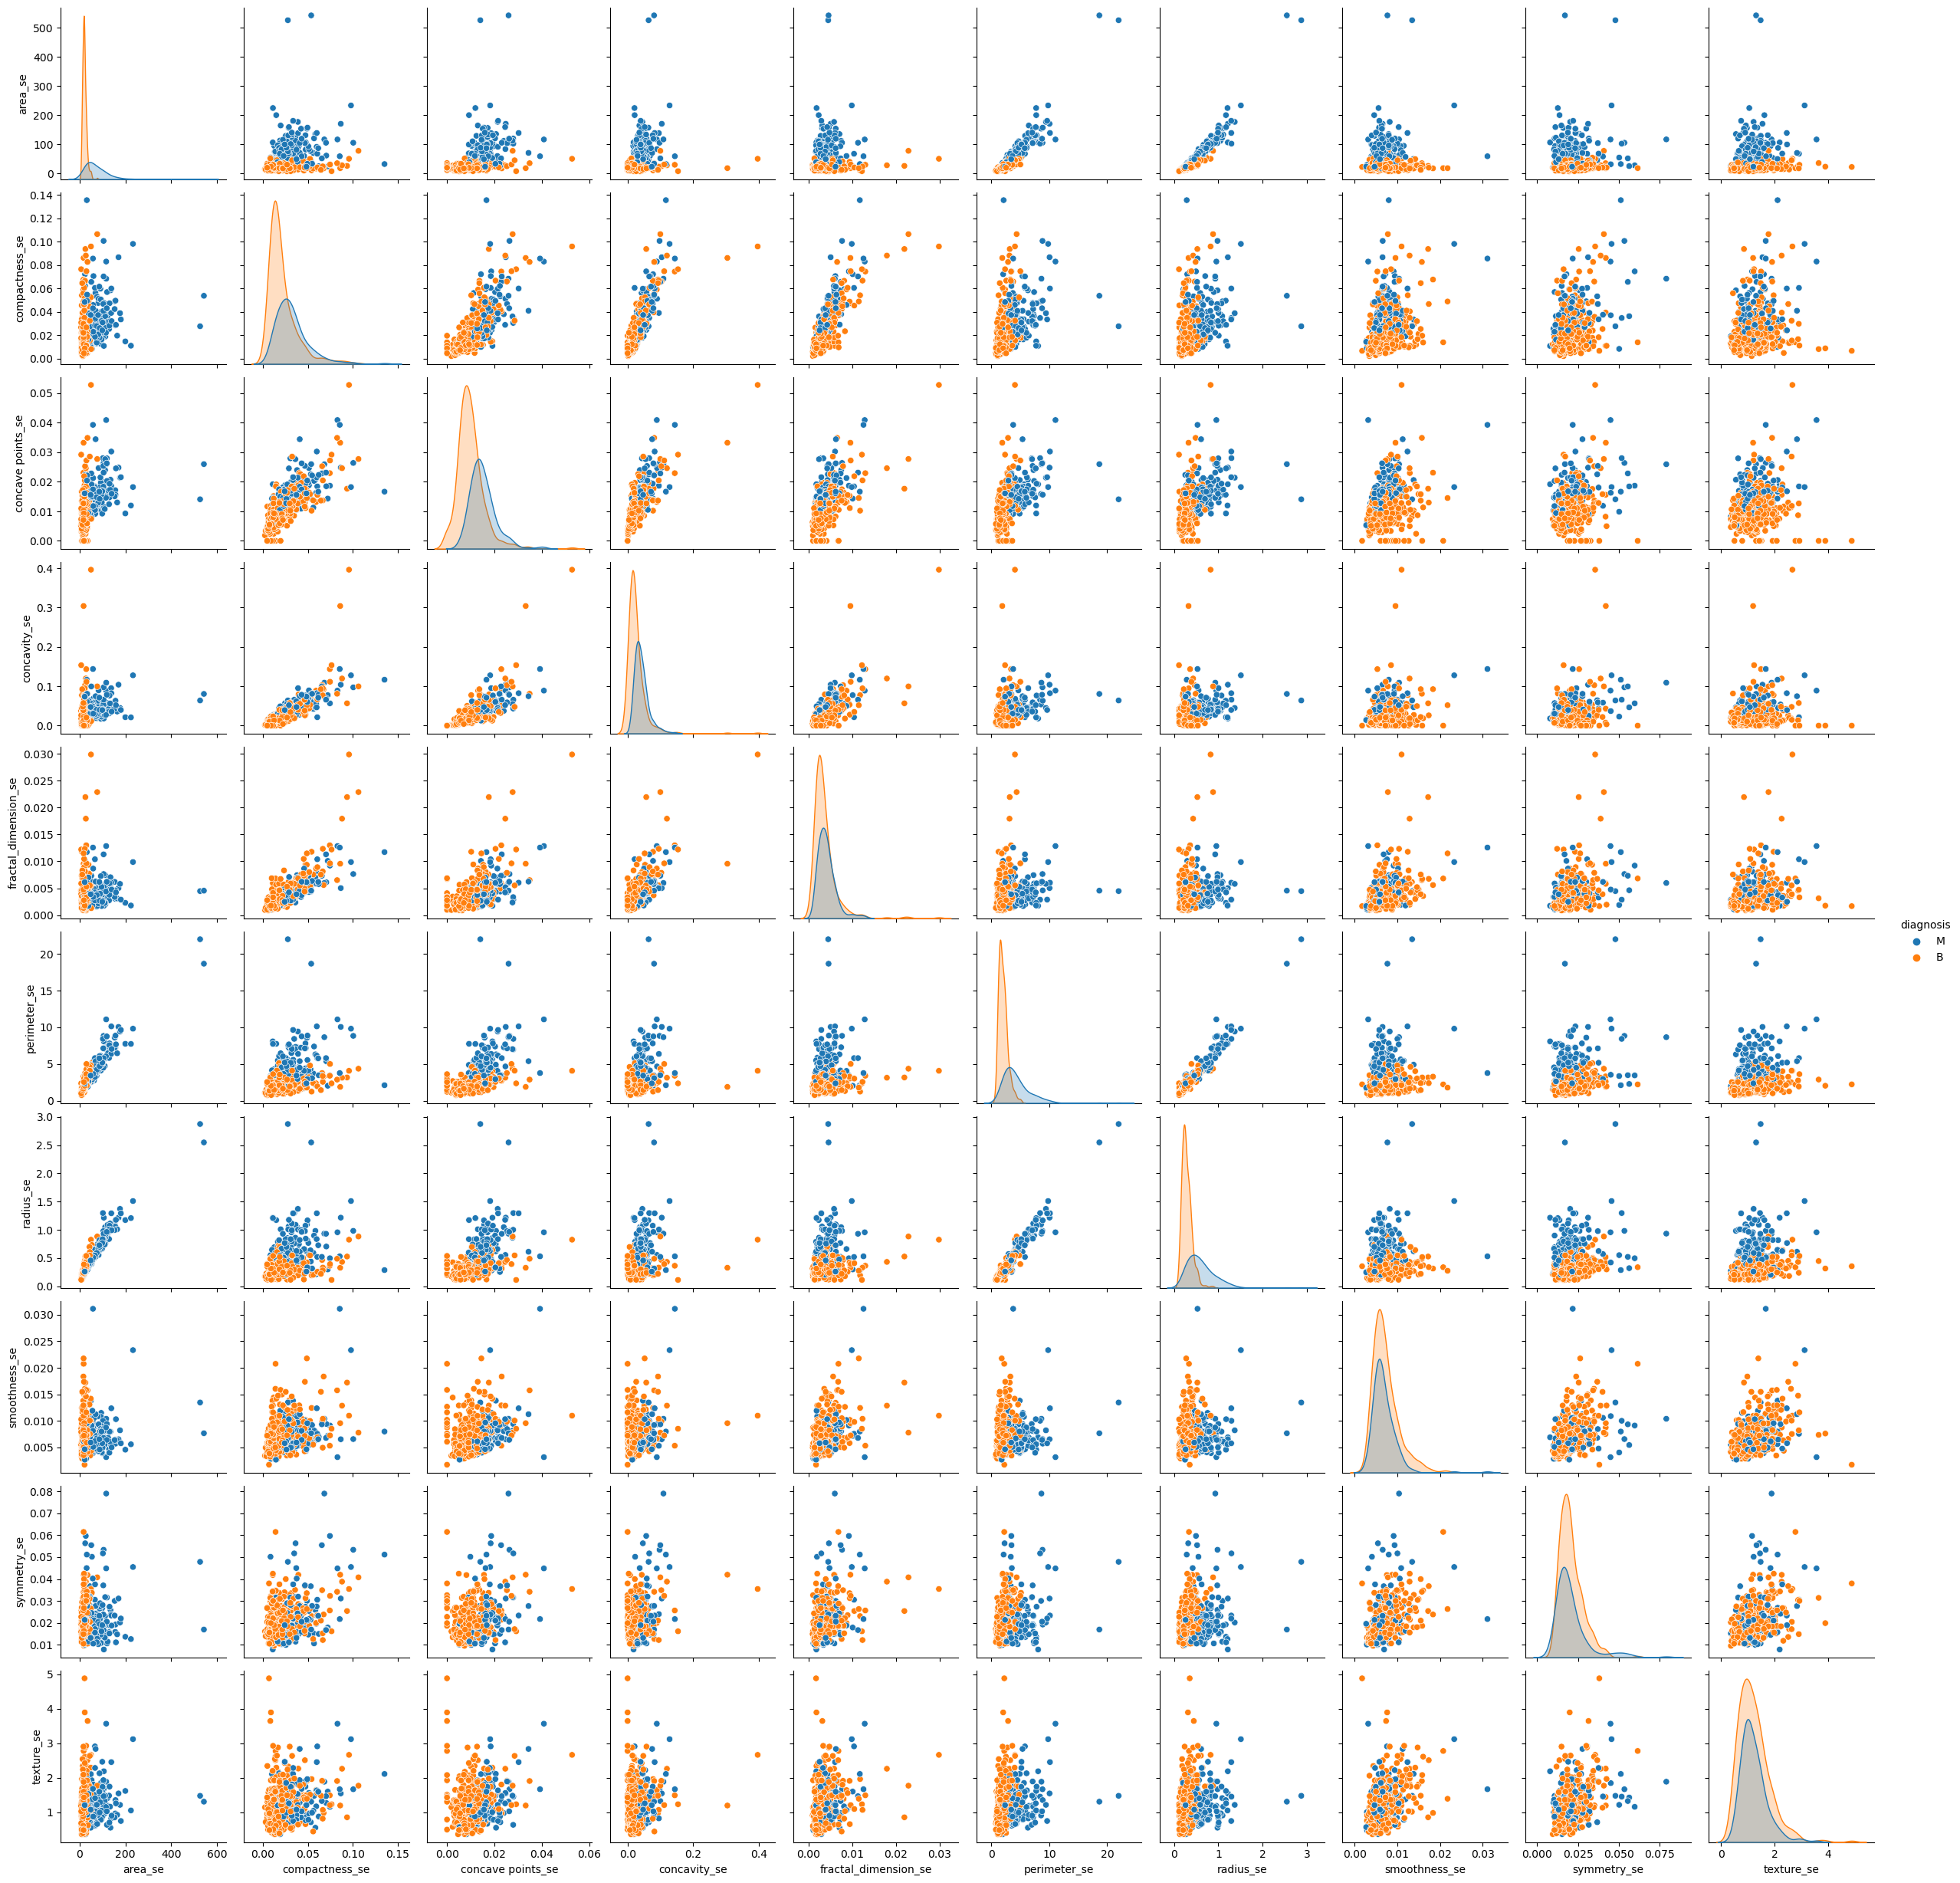

In [86]:
cols_se = [i for i in df_breast.columns if i.endswith("_se")]

pplot2 = sns.pairplot(df_breast[["diagnosis"] + cols_se], hue="diagnosis")
plt.show()

### Pire mesure

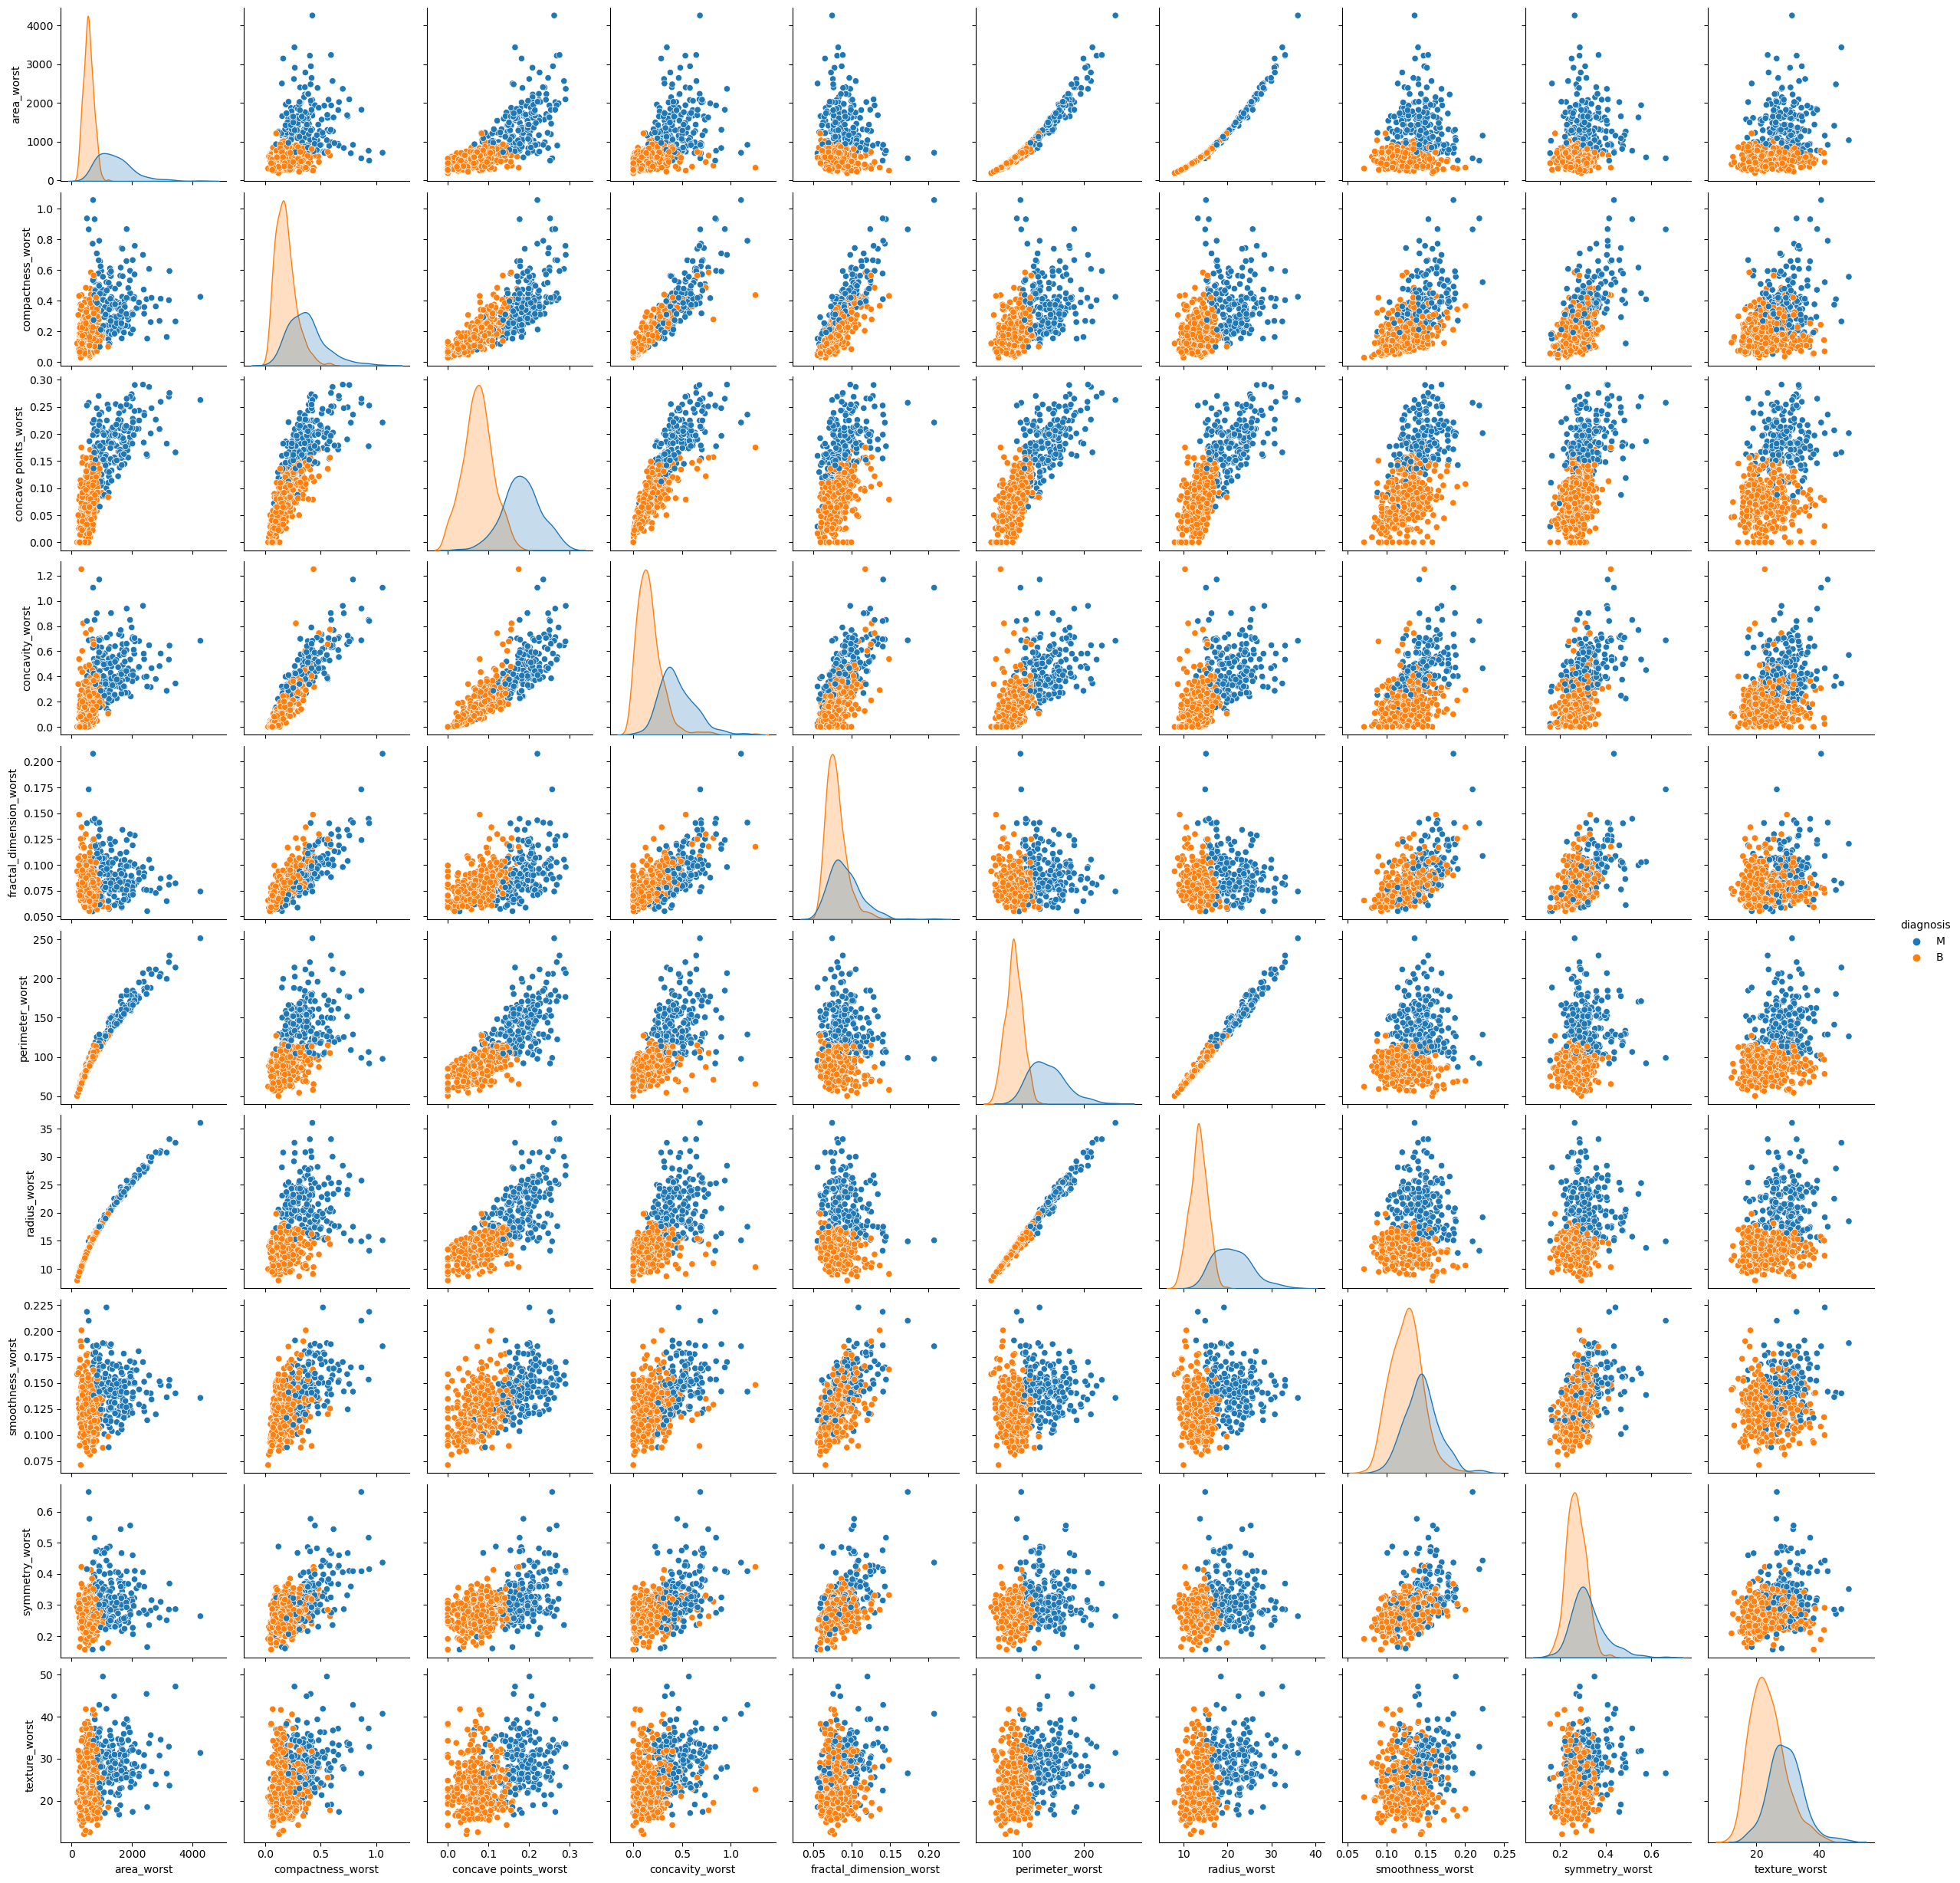

In [87]:
cols_worst = [i for i in df_breast.columns if i.endswith("_worst")]

pplot3 = sns.pairplot(df_breast[["diagnosis"] + cols_worst], hue="diagnosis")
plt.show()

Ces résultats montrent que ce sont les moyennes et les pires mesures des noyaux cellulaires prélevés qui semblent avoir l'impact le plus discriminant sur le caractère bénin ou malin des cellules. 
Les variables les moins discriminantes semblent être la dimension fractale, la douceur, la symétrie et la texture

# 2. Évaluation d'un modèle  

Pour cette partie, vous disposez du code du consultant précédent sur lequel vous pouvez vous appuyer. Votre mission :  
- Expliquez les étapes du code réalisé :  
        - En quoi consiste la standardisation des données? Pourquoi est-elle importante ici?   
        - Expliquez à quoi sert le fait de séparer les données en entraînement et en test.   
<span style="color:blue">Les différentes variables numériques ont des échelles de mesure complètement différentes. Or ça n'est pas la valeur absolue d'une variable qui nous intéresse dans un modèle d'apprentissage mais sa position dans la distribution. La standardisation permet de mettre toutes les variables à la même échelle tout en conservant la distribution de chaque variable au sein de la population.  
Les données sont séparées en entraînement et en test pour éviter de sélectionner un modèle qui serait en sur-apprentissage : il aurait des performances excellentes sur les données sur lesquelles il s'est entraîné mais catastrophiques sur des nouvelles données. Ce partitionnement permet de valider que le modèle choisi n'est pas en surapprentissage, en évaluant ses performances sur les données de test, sur lesquelles il ne s'est pas entraîné. Dans les cas où on optimise les hyper-paramètres, il faut même séparer les données en 3 : entraînement, validation et test, mais c'est une autre histoire...</span>  
- Expliquez simplement comment fonctionne les arbres de décision.  
<span style="color:blue"> Un arbre de décision consiste à partitionner successivement les individus en fonction des variables explicatives, en commençant par la variable la plus discriminante. On parle de "noeud" à chaque ajout de partitionnement. Plus le nombre de noeuds est élevé, plus le risque de surapprentissage est important. Au "bout" de ces partitionnements successifs on prédit l'appartenance à une des classes en fonction de comment elles y sont représentées au sein des données d'entraînement.</span>  

- Quelles sont les limites de la métrique choisie pour évaluer le modèle? Pour le même modèle, sortez d'autres métriques d'évaluation en les commentant (précision, recall, F1 score, matrice de confusion...)  
<span style="color:blue">L'accuracy ne rend pas compte de la qualité de notre modèle de prédiction au sein d'une classe donnée, ici les individus sains ou malades. En particulier, en cas de classes très déséquilibrées en termes d'effectifs, on peut avoir une accuracy très bonne mais des prédictions très mauvaises dans la classe dont les effectifs sont faibles. </span>  

In [88]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import pandas as pd

breast_cancer = pd.read_csv("data/breast_cancer.csv")

# On sépare les features du target 
features, target = breast_cancer.loc[:, 'radius_mean':'fractal_dimension_worst'], breast_cancer["diagnosis"]

# On split notre dataframe en 2
feat_train, feat_test, target_train, target_test = train_test_split(
    features, target,
    test_size = 0.4)

# On standardise  
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

# On initalise le modèle 
tree_classif = tree.DecisionTreeClassifier()

# On l'entraîne sur nos données d'entraînement
tree_classif.fit(feat_train, target_train)

# On l'utilise pour prédire sur les données de test
predict_class = tree_classif.predict(feat_test)

# On calcule l'accuracy du modèle  
acc = accuracy_score(predict_class, target_test)
print(acc)

0.9166666666666666


On sort la matrice de confusion, puis la précision, le rappel et le F1 score avec `sklearn` : 

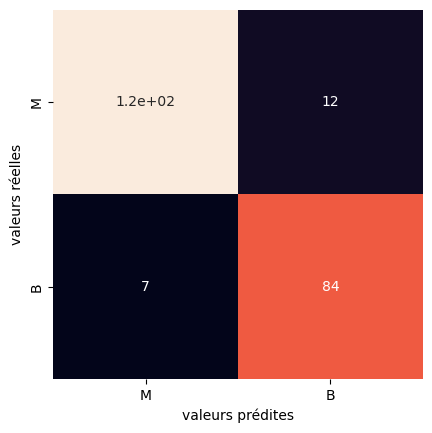

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# On calcule la matrice de confusion
conf = confusion_matrix(target_test, predict_class)

# On affiche la matrice sous forme de graphique avec seaborn
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(breast_cancer["diagnosis"].unique())
            , yticklabels=list(breast_cancer["diagnosis"].unique()))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')
plt.show()

Le modèle semble s'en sortir bien dans les deux classes, et mieux pour prédire correctement les cellules malignes que bénines. Voyons ce que donnent les autres métriques : 

In [90]:
from sklearn.metrics import precision_recall_fscore_support
my_metrics = precision_recall_fscore_support(target_test, predict_class, labels = ["M", "B"])

Dans `my_metrics` on a la précision, le rappel et le beta score pour chacune des deux classes. On donne le résultat pour la classe "cellule maligne" : 

In [91]:
print(f"La précision pour la prédiction d'une cellule maligne est de {my_metrics[0][0].round(2)}, \n le rappel de {my_metrics[1][0].round(2)} et le beta score de {my_metrics[2][0].round(2)}")

La précision pour la prédiction d'une cellule maligne est de 0.88, 
 le rappel de 0.92 et le beta score de 0.9


# 3. Entraînement d'un modèle concurrent   
En suivant la même logique, entraînez un modèle de classification avec la méthode des k plus proches voisins (ou k-nn). Expliquez comment il fonctionne. Sélectionnez le nombre de voisins qui vous donne le meilleur F1-score (en testant de 2 à 10 voisins) et comparez les performances de ce modèle avec le modèle précédent selon les différentes métriques.  

__Bonus__ : Si vous avez le temps, entraînez un autre modèle de classification issu de `sklearn`, décrivez-le et présentez ses performances.


Le modèle des k plus proches voisins consiste à prédire la classe d'une observation en fonction de la classe des k observations les plus proches, au sens de la distance en fonction des variables explicatives. On peut optimiser le nombre de voisins en fonction des résultats de la métrique d'intérêt : 

In [92]:
from sklearn.neighbors import KNeighborsClassifier

# On crée une fonction pour pouvoir changer le nombre de voisins
def knn_classif(nb_voisins):   
    # On initalise le modèle 
    knn_classif = KNeighborsClassifier(n_neighbors = nb_voisins)

    # On l'entraîne sur nos données d'entraînement
    knn_classif.fit(feat_train, target_train)

    # On l'utilise pour prédire sur les données de test
    predict_class = knn_classif.predict(feat_test)

    # On calcule le F1 score du modèle  
    my_metrics = precision_recall_fscore_support(target_test, predict_class, labels = ["M", "B"])
    return my_metrics[2][0].round(2)

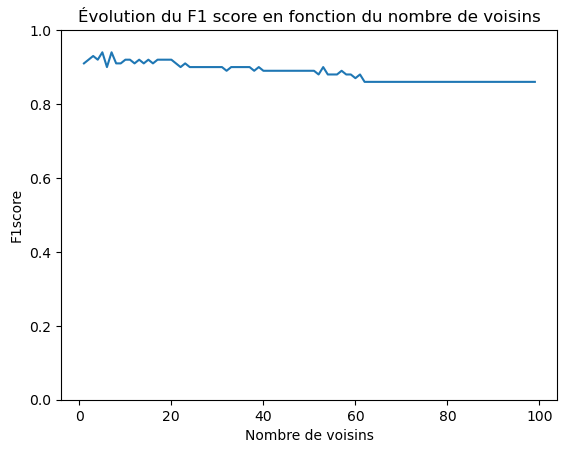

In [93]:
# On mute un warning intempestif
import warnings
warnings.simplefilter('ignore')

# Avec cette fonction on peut définir un plot qui donne le F1 score en fonction du nombre de voisins
f1_score = [knn_classif(i) for i in range(1, 100)]

plt.plot(list(range(1, 100)), f1_score)
plt.ylim(0, 1)
plt.xlabel("Nombre de voisins")
plt.ylabel("F1score")
plt.title("Évolution du F1 score en fonction du nombre de voisins")
plt.show()

Logiquement, le F1 score baisse avec un trop grand nombre de voisins puisque le modèle aura tendance à prédire seulement la classe majoritaire.  

Autour de 10 voisins, le F1 score semble optimal. On opte donc pour ce paramétrage et on compare la matrice de confusion obtenue avec celle obtenue avec l'arbre de décision :  

In [94]:
warnings.simplefilter('ignore')
# On initalise le modèle 
knn_classif = KNeighborsClassifier(n_neighbors = 10)

# On l'entraîne sur nos données d'entraînement
knn_classif.fit(feat_train, target_train)

# On l'utilise pour prédire sur les données de test
predict_class = knn_classif.predict(feat_test)

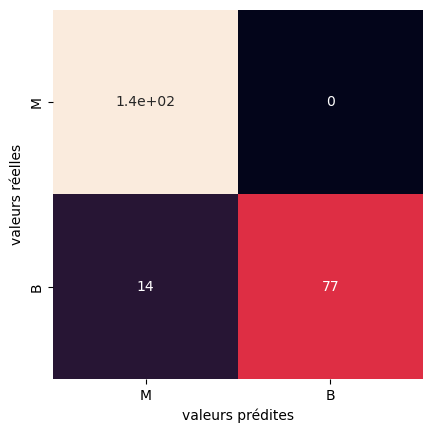

In [95]:
# On calcule la matrice de confusion
conf = confusion_matrix(target_test, predict_class)

# On affiche la matrice sous forme de graphique avec seaborn
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(breast_cancer["diagnosis"].unique())
            , yticklabels=list(breast_cancer["diagnosis"].unique()))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')
plt.show()

Ce modèle détecte quasiment parfaitement les cellules malignes! Ce résultat est cependant suspect et peut être dû au fait que nous avons calibré notre modèle sur nos données test. Il aurait fallu valider ce résultat en partitionnant trois fois notre échantillon (entraînement, validation, test), ou en faisant de la validation croisée...

# 4. Bonus : Version allégée du modèle avec d'aussi bonnes performances? 

D'après notre analyse exploratoire, il semblerait qu'il ne soit pas forcément indispensable de prendre la moyenne, l'écart-type et la pire mesure pour chacune des variables. De plus, le raidus et le périmètre semblent parfaitement corrélés, donc autant n'en prendre qu'un des deux. Voyons ce que donne ce modèle avec trois fois moins de variables : 

In [96]:
# On sélectionne les colonnes qui nous intéressent
cols = [i for i in cols_moy if i != "radius_mean"]
# On regarde à quels indexs ils correspondent
index_cols = list(features.columns.isin(cols))

# On en déduit des nouveaux feat_train et feat_test
feat_train_new = feat_train[:, index_cols]
feat_test_new = feat_test[:, index_cols]

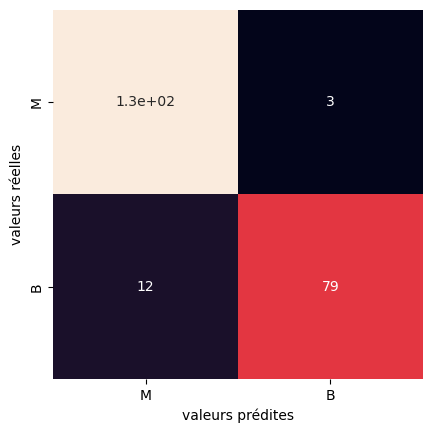

In [97]:
warnings.simplefilter('ignore')

# On initalise le modèle 
knn_classif = KNeighborsClassifier(n_neighbors = 10)

# On l'entraîne sur nos données d'entraînement
knn_classif.fit(feat_train_new, target_train)

# On l'utilise pour prédire sur les données de test
predict_class = knn_classif.predict(feat_test_new)

# On calcule la matrice de confusion
conf = confusion_matrix(target_test, predict_class)

# On affiche la matrice sous forme de graphique avec seaborn
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(breast_cancer["diagnosis"].unique())
            , yticklabels=list(breast_cancer["diagnosis"].unique()))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')
plt.show()

Le modèle a des performances semblables avec 3 fois moins de variables, et peut-être évite-t-il aussi du surapprentissage. Il faudrait tester sur plus d'observations et en partitionnant en sets d'entraînement, de validation et de test. 